In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('Train.csv',nrows=11000)

In [30]:
print(df.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [31]:
print(df.tail())

          ID          Datetime  Count
10995  10995  26-11-2013 03:00    118
10996  10996  26-11-2013 04:00     66
10997  10997  26-11-2013 05:00     50
10998  10998  26-11-2013 06:00     84
10999  10999  26-11-2013 07:00     86


In [32]:
train=df[0:10000]

In [33]:
test=df[10000:]

In [34]:
train.shape

(10000, 3)

In [35]:
test.shape

(1000, 3)

In [36]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')

/home/warrior/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [37]:
df.index = df.Timestamp

In [38]:
df = df.resample('D').mean()

In [39]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

/home/warrior/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [14]:
train.index = train.Timestamp

In [15]:
train = train.resample('D').mean()

In [16]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

/home/warrior/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [17]:
test.index = test.Timestamp

In [18]:
test = test.resample('D').mean()

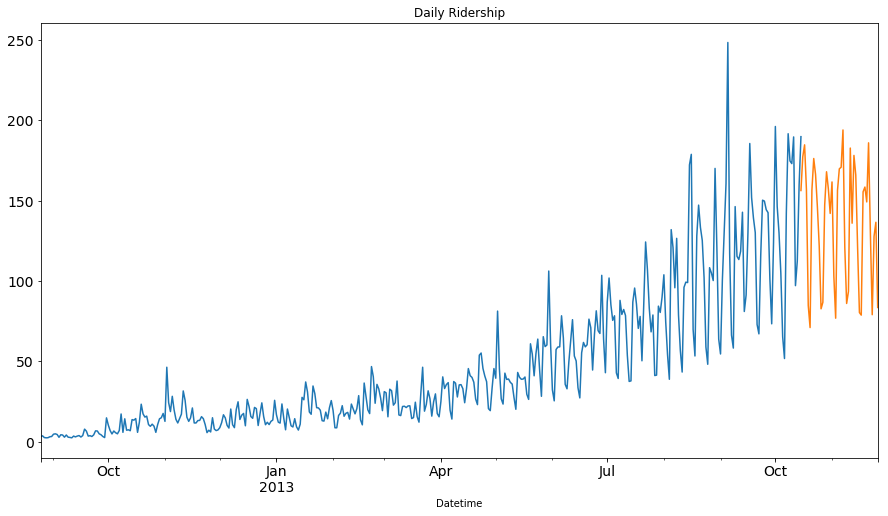

In [19]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [20]:
dd= np.asarray(train.Count)

In [21]:
y_hat = test.copy()

In [22]:
y_hat['naive'] = dd[len(dd)-1]

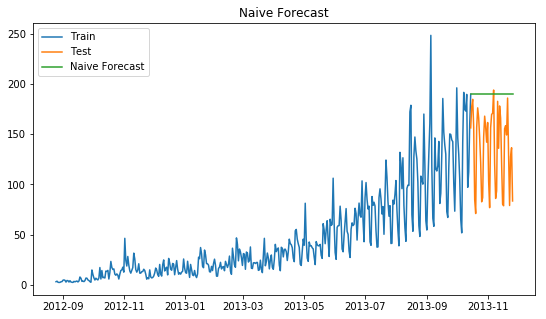

In [23]:
plt.figure(figsize=(9,5))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print("Root mean square Error: ", rms)

Root mean square Error:  65.00013416801895


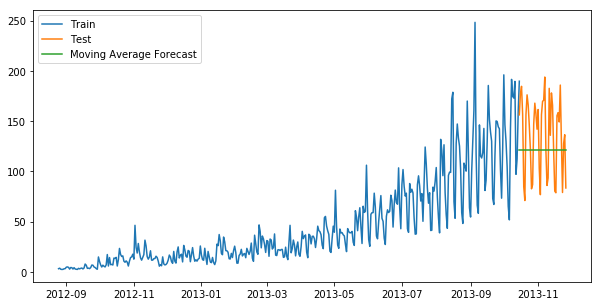

In [26]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(10,5))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print("Root mean square Error: ", rms)

Root mean square Error:  39.93520875033479
